In [1]:
from sklearn.datasets import fetch_lfw_people

In [2]:
faces = fetch_lfw_people()

In [3]:
positive_patches = faces.images

In [4]:
positive_patches.shape

(13233, 62, 47)

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

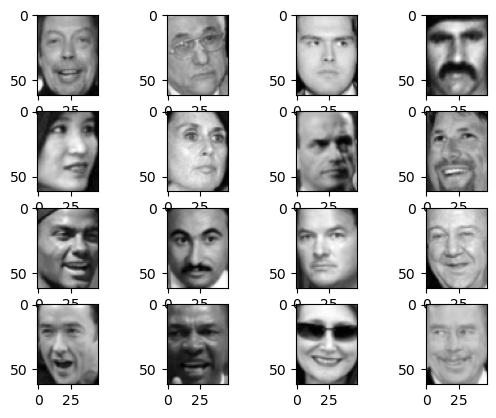

In [7]:
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(positive_patches[i,:,:],cmap='gray')

# Nouvelle section

# Nouvelle section

In [8]:
from skimage import color, feature
import skimage.data

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1a2e346f970>)

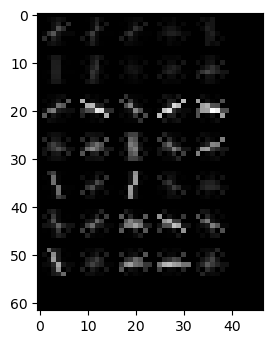

In [22]:
sample=positive_patches[9]
if sample.shape[-1]==3:
    sample = color.rgb2gray(sample) 
hog_vec, hog_vis = feature.hog(sample, visualize=True)
plt.subplot(1,2,1),plt.imshow(sample,cmap='gray')
plt.subplot(1,2,1),plt.imshow(hog_vis,cmap='gray')

In [23]:
from skimage import data, transform
from sklearn.feature_extraction.image import PatchExtractor

In [39]:
imgs_to_use = ['camera', 'text', 'coins', 'moon', 'page', 'clock', 'immunohistochemistry', 'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]
def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
 extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
 extractor = PatchExtractor(patch_size=extracted_patch_size,max_patches=N, random_state=0)
 patches = extractor.transform(img[np.newaxis])
 if scale != 1:
   patches = np.array([transform.resize(patch, patch_size) 
                      for patch in patches])
 return patches
negative_patches = np.vstack([extract_patches(im, 1000, scale) 
                             for im in images for scale in [0.5, 1.0, 2.0]])

ValueError: the input array must have size 3 along `channel_axis`, got (512, 512)

In [33]:
negative_patches.shape

NameError: name 'negative_patches' is not defined

In [13]:
#dataset equilibré

In [14]:
N1=min(len(positive_patches),len(negative_patches))

NameError: name 'negative_patches' is not defined

Q7

In [15]:
y=np.concatenate((np.ones(N1),np.zeros(N1)),axis=0)

NameError: name 'N1' is not defined

In [16]:
x=np.zeros((2*N1,len(hog_vec)))

NameError: name 'N1' is not defined

Q6: Positive_image

In [17]:
for i in range(N1):
  x[i,:]=feature.hog(color.rgb2gray(positive_patches[i,:]))

NameError: name 'N1' is not defined

In [18]:
import numpy as np
file=open("face_data.npy","wb")
np.save(file,x)
file.close

file=open("face_labels.npy","wb")
np.save(file,y)
file.close

NameError: name 'x' is not defined

2. Binary Classification using Scikit-Learn

In [19]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# View the shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

NameError: name 'x' is not defined

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
models = [
 { "estimater": KNeighborsClassifier(),
 "params": {
 "n_neighbors": [25,30,35,45],
 "weights": ['uniform','distance'],
 "leaf_size": [25,30,35],
 "p": [1,2,3],
 }
 },
 { "estimater": DecisionTreeClassifier(),
 "params": {
 "criterion": ['gini','entropy'],
 "splitter": ['best','random'],
 "max_depth": [None,90,95,100],
 "max_features": [None, "auto","sqrt","log2"],
 "random_state": [42]
 }
 },

 { "estimater": svm.SVC(),"params": {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']
 }
 },
 { "estimater": RandomForestClassifier(),
 "params": {
 "criterion": ['gini','entropy'],
 "bootstrap": [True, False],
 "max_depth": [85,90,95,100],
 "max_features": ['sqrt','log2'],
 "n_estimators": [60, 80, 90],
 "random_state": [42]
 }
 }
]
column_names = ["KNeighbors", "DecisionTree", "SVM", "RF"]
entries = []
max_acc = 0
best_model = None
for model in models:
 print(model["estimater"])
 # Create model
 clf = model["estimater"]
 # Instantiate the grid search model
 grid_search = GridSearchCV(estimator = clf, param_grid = model["params"],
 cv = 5)

 # Fit the model
 grid_search.fit(X_train, y_train);
 # Make predictions on the test set compute accuracy metric
 predicted = grid_search.predict(X_test)
 acc = accuracy_score(predicted, y_test)
 entries.append(acc)
 print(grid_search.best_params_)
 # Get the best model with the highest accuracy
 if acc > max_acc:
   max_acc = acc
   best_model = grid_search

KNeighborsClassifier()


NameError: name 'X_train' is not defined